In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import dragoman as dm
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
g1 = {'loc': 0, 'scale': 2}
g2 = {'loc': 2, 'scale': 1}

In [4]:
x1 = stats.norm(**g1).rvs(20)
x2 = stats.norm(**g2).rvs(20)

In [5]:
def E(x, c1, c2, e1, e2):
    p1 = stats.norm(**c1).pdf(x)
    p2 = stats.norm(**c2).pdf(x)
    
    e1[:] = p1 / (p1 + p2)
    e2[:] = p2 / (p1 + p2)

In [6]:
def M(x, c1, c2, e1, e2):
    c1['loc'] = np.average(x, weights=e1)
    c2['loc'] = np.average(x, weights=e2)
    
    c1['scale'] = np.sqrt(np.average(np.square(x-c1['loc']), weights=e1))
    c2['scale'] = np.sqrt(np.average(np.square(x-c2['loc']), weights=e2))

In [7]:
def plot(x, c1, c2, e1, e2):
    xspace = np.linspace(-5, 5, 1000)
    plt.plot(xspace, stats.norm(**c1).pdf(xspace), c='b')
    plt.plot(xspace, stats.norm(**c2).pdf(xspace), c='r')
    
    plt.plot(xspace, stats.norm(**g1).pdf(xspace), c='k', ls='--', alpha=0.5)
    plt.plot(xspace, stats.norm(**g2).pdf(xspace), c='k', ls='--', alpha=0.5)
    
    plt.scatter(x, np.zeros_like(x), s=100, c=e1, cmap='RdBu', edgecolor='k')

In [8]:
x = np.concatenate([x1, x2])

In [9]:
#random clusters init:

c1 = {}
c2 = {}

c1['loc'] = np.random.rand()
c2['loc'] = np.random.rand()
c1['scale'] = np.random.rand()
c2['scale'] = np.random.rand()

In [10]:
e1 = np.random.rand(x.size)
e2 = np.random.rand(x.size)

In [11]:
E(x, c1, c2, e1, e2)

In [12]:
for i in range(100):
    E(x, c1, c2, e1, e2)
    M(x, c1, c2, e1, e2)

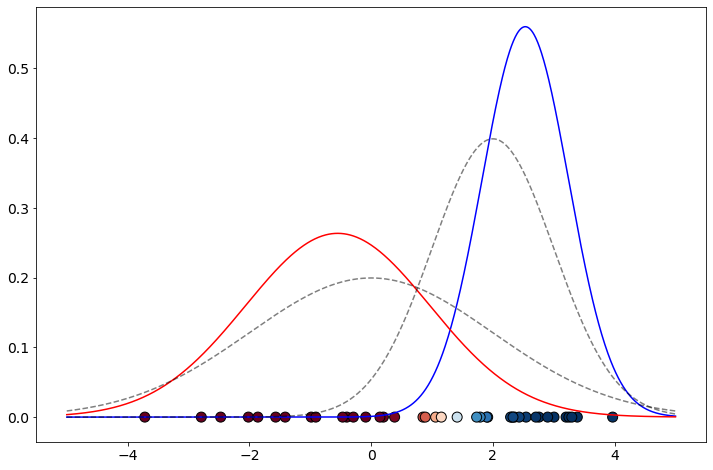

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
plot(x, c1, c2, e1, e2)